# 1- Initialisation

In [1]:
# Librairies pour le traitement des données
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.machine_learning_common_functions import *

%matplotlib inline

low_memory=False # faible mémoire vive (RAM) pour gérer la lecture de gros fichiers

In [2]:
# Chargement des Data Sets
df15 = pd.read_csv('2015-building-energy-benchmarking.csv', low_memory=low_memory)
df16 = pd.read_csv('2016-building-energy-benchmarking.csv', low_memory=low_memory)

Le data set contient :
	- 3340 lignes et 47 colonnes.
	- 26512 valeurs manquantes, ce qui représente 16.89 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
1800,23404,2015,NonResidential,Small- and Mid-Sized Office,SWEDISH HOSPITAL MEDICAL CENTER,8590900710,"{'latitude': '47.60776197', 'longitude': '-122...",3,EAST,1959,1,3.0,25151,0,25151,Office,Office,24155.0,NaN,NaN,NaN,NaN,NaN,77.0,63.9,73.7,134.3,146.1,1543147.0,1780117.0,826402.0,210066.0,716774.0,0.0,0.0,0.0,68.78,2.61,No,NaN,Compliant,NaN,NaN,19.0,NaN,12.0,18379
1011,20452,2015,Multifamily LR (1-4),Low-Rise Multifamily,ELIZABETH JAMES HOUSE,955000480,"{'latitude': '47.61958474', 'longitude': '-122...",3,CENTRAL,1968,1,3.0,40779,0,40779,"Multifamily Housing, Parking",Multifamily Housing,38212.0,Parking,0.0,NaN,NaN,NaN,65.0,32.5,35.8,102.0,112.5,1240875.0,1368520.0,0.0,363680.0,1240926.0,0.0,0.0,0.0,8.65,0.08,No,NaN,Compliant,NaN,NaN,35.0,NaN,6.0,18789


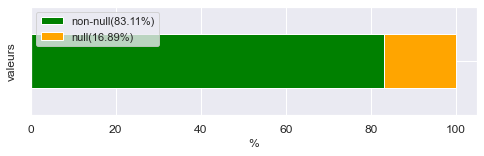

In [3]:
# Vérification de la structure du Data Set
verifier_taille(df15)
afficher_echantillon(df15)

Le data set contient :
	- 3376 lignes et 46 colonnes.
	- 19952 valeurs manquantes, ce qui représente 12.85 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1052,20653,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Aristo,2015 Terry Ave,Seattle,WA,98121.0,1354300000,7,DOWNTOWN,47.61720,-122.33590,2004,1.0,5,62665,0,62665,"Multifamily Housing, Parking",Multifamily Housing,62565.0,Parking,26240.0,NaN,NaN,NaN,58.0,45.5,49.299999,88.400002,92.099998,2845068.0,3083156.75,0.0,3.564804e+05,1216311.0,16287.56934,1628757.0,False,NaN,Compliant,NaN,94.98,1.52
2235,24895,2016,NonResidential,Supermarket / Grocery Store,Promenade South 1,2309 S Jackson St,Seattle,WA,98144.0,3646100390,3,CENTRAL,47.59881,-122.30189,1980,1.0,1,30630,0,30630,"Other, Supermarket/Grocery Store",Supermarket/Grocery Store,28470.0,Other,2442.0,NaN,NaN,NaN,27.0,196.0,200.399994,615.400024,629.200012,6058494.0,6194518.00,0.0,1.775643e+06,6058493.0,0.00000,0.0,False,NaN,Compliant,NaN,42.24,1.38


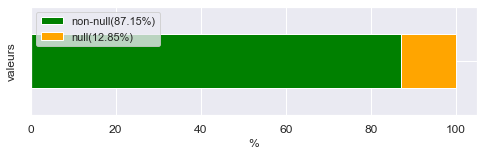

In [4]:
# Vérification de la structure du Data Set
verifier_taille(df16)
afficher_echantillon(df16)

In [5]:
nans = nan_cols(df15, 80)
nans # Affichage des colonnes trouvées

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,ThirdLargestPropertyUseType,2780,83.23,560,16.77
1,ThirdLargestPropertyUseTypeGFA,2780,83.23,560,16.77
2,YearsENERGYSTARCertified,3230,96.71,110,3.29
3,Comment,3327,99.61,13,0.39
4,Outlier,3256,97.49,84,2.51
5,2010 Census Tracts,3116,93.29,224,6.71
6,City Council Districts,3127,93.62,213,6.38


In [6]:
nan_cols(df15)

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,OSEBuildingID,0,0.00,3340,100.00
1,DataYear,0,0.00,3340,100.00
2,BuildingType,0,0.00,3340,100.00
3,PrimaryPropertyType,0,0.00,3340,100.00
4,PropertyName,0,0.00,3340,100.00
5,TaxParcelIdentificationNumber,2,0.06,3338,99.94
6,Location,0,0.00,3340,100.00
7,CouncilDistrictCode,0,0.00,3340,100.00
8,Neighborhood,0,0.00,3340,100.00
9,YearBuilt,0,0.00,3340,100.00


In [7]:
nans = nan_cols(df16,80) 
nans # Affichage des colonnes trouvées

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,ThirdLargestPropertyUseType,2780,82.35,596,17.65
1,ThirdLargestPropertyUseTypeGFA,2780,82.35,596,17.65
2,YearsENERGYSTARCertified,3257,96.48,119,3.52
3,Comments,3376,100.00,0,0.00
4,Outlier,3344,99.05,32,0.95


In [8]:
df15.Outlier.unique()

array([nan, 'High Outlier', 'Low Outlier'], dtype=object)

In [9]:
doublons(df15['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

In [10]:
doublons(df16['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

# Data Simplification & Cleanning

In [11]:
Cols = ['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyName',	'PropertyGFATotal', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'GHGEmissions(MetricTonsCO2e)', 'CouncilDistrictCode',	'Neighborhood',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']

df15s = df15[Cols]
df15s['SiteEUI(kBtu)'] = df15['SiteEUI(kBtu/sf)']*df15['PropertyGFATotal']
df15s = renameCol(df15s, 'SiteEUI(kBtu)', 'TotalEnergy')
df15s = renameCol(df15s, 'GHGEmissions(MetricTonsCO2e)', 'TotalEmission')

df15s

C:\Users\Shadow\AppData\Local\Temp/ipykernel_18816/3462362933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15s['SiteEUI(kBtu)'] = df15['SiteEUI(kBtu/sf)']*df15['PropertyGFATotal']


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,Hotel,88434.0,65.0,78.9,249.43,7,DOWNTOWN,1927,1,12.0,Compliant,NaN,6977442.6
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,Hotel,83880.0,51.0,94.4,263.51,7,DOWNTOWN,1996,1,11.0,Compliant,NaN,9776630.4
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,Hotel,757243.0,18.0,96.6,2061.48,7,DOWNTOWN,1969,1,41.0,Compliant,NaN,92928234.0
3,5,NonResidential,Hotel,HOTEL MAX,61320,Hotel,61320.0,1.0,460.4,1936.34,7,DOWNTOWN,1926,1,10.0,Compliant,High Outlier,28231728.0
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,Hotel,123445.0,67.0,120.1,507.70,7,DOWNTOWN,1980,1,18.0,Compliant,NaN,14398789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,44650,Multifamily Housing,44650.0,71.0,25.6,7.97,2,DOWNTOWN,2000,1,4.0,Compliant,NaN,1143040.0
3336,50055,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,42393,Multifamily Housing,31748.0,98.0,48.6,30.69,4,NORTHEAST,2014,1,7.0,Compliant,NaN,2060299.8
3337,50057,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,319481,NaN,NaN,79.0,52.7,627.97,7,DOWNTOWN,2015,1,40.0,Compliant,NaN,16836648.7
3338,50058,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,48230,Multifamily Housing,22310.0,44.0,34.8,5.42,4,NORTHEAST,1981,1,3.0,Compliant,NaN,1678404.0


In [12]:
Cols = ['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyName',	'PropertyGFATotal', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions', 'CouncilDistrictCode',	'Neighborhood',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']
 
df16s = df16[Cols]
df16s['SiteEUI(kBtu)'] = df16['SiteEUI(kBtu/sf)']*df16['PropertyGFATotal']
df16s = renameCol(df16s, 'SiteEUI(kBtu)', 'TotalEnergy')
df16s = renameCol(df16s, 'TotalGHGEmissions', 'TotalEmission')
df16s

C:\Users\Shadow\AppData\Local\Temp/ipykernel_18816/549478390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16s['SiteEUI(kBtu)'] = df16['SiteEUI(kBtu/sf)']*df16['PropertyGFATotal']


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy
0,1,NonResidential,Hotel,Mayflower park hotel,88434,Hotel,88434.0,60.0,81.699997,249.98,7,DOWNTOWN,1927,1.0,12,Compliant,NaN,7.225058e+06
1,2,NonResidential,Hotel,Paramount Hotel,103566,Hotel,83880.0,61.0,94.800003,295.86,7,DOWNTOWN,1996,1.0,11,Compliant,NaN,9.818057e+06
2,3,NonResidential,Hotel,5673-The Westin Seattle,956110,Hotel,756493.0,43.0,96.000000,2089.28,7,DOWNTOWN,1969,1.0,41,Compliant,NaN,9.178656e+07
3,5,NonResidential,Hotel,HOTEL MAX,61320,Hotel,61320.0,56.0,110.800003,286.43,7,DOWNTOWN,1926,1.0,10,Compliant,NaN,6.794256e+06
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),175580,Hotel,123445.0,75.0,114.800003,505.01,7,DOWNTOWN,1980,1.0,18,Compliant,NaN,2.015658e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,12294,Office,12294.0,46.0,69.099998,20.94,2,GREATER DUWAMISH,1990,1.0,1,Error - Correct Default Data,NaN,8.495154e+05
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,16000,Other - Recreation,16000.0,NaN,59.400002,32.17,2,DOWNTOWN,2004,1.0,1,Compliant,NaN,9.504000e+05
3373,50224,Nonresidential COS,Other,Queen Anne Pool,13157,Other - Recreation,7583.0,NaN,438.200012,223.54,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1,Compliant,NaN,5.765398e+06
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,14101,Other - Recreation,6601.0,NaN,51.000000,22.11,1,GREATER DUWAMISH,1989,1.0,1,Compliant,NaN,7.191510e+05


Le data set contient :
	- 6716 lignes et 18 colonnes.
	- 8604 valeurs manquantes, ce qui représente 7.12 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy
913,20217,SPS-District K-12,K-12 School,Sand Point Elementary,38624,K-12 School,41408.0,83.0,34.400002,38.78,4,NORTHEAST,1958,1.0,1.0,Error - Correct Default Data,NaN,1.328666e+06
327,462,NonResidential,Small- and Mid-Sized Office,DELRIDGE BUILDING,55593,Office,55593.0,57.0,73.700000,88.50,1,DELRIDGE,1960,1.0,3.0,Compliant,NaN,4.097204e+06


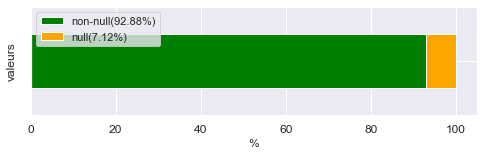

In [13]:
# Concat 2015 & 2016 data
# df = df15s
df = pd.concat([df15s, df16s], axis=0)

verifier_taille(df)
afficher_echantillon(df)

In [14]:
df[df['ComplianceStatus']=='Not Compliant']

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy
767,19798,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,33166,NaN,NaN,NaN,NaN,NaN,4,NORTHEAST,1977,1.0,3.0,Not Compliant,NaN,NaN
1346,21548,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,40086,NaN,NaN,NaN,NaN,NaN,7,MAGNOLIA / QUEEN ANNE,1967,1.0,4.0,Not Compliant,NaN,NaN
1838,23508,Multifamily LR (1-4),Low-Rise Multifamily,SEAVIEW CONDOMINIUM,53040,NaN,NaN,NaN,NaN,NaN,7,MAGNOLIA / QUEEN ANNE,1930,1.0,3.0,Not Compliant,NaN,NaN


In [15]:
df = df[df['ComplianceStatus']=='Compliant']
df = df.drop(columns=['ComplianceStatus'])
df

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,Hotel,88434.0,65.0,78.900000,249.43,7,DOWNTOWN,1927,1.0,12.0,NaN,6.977443e+06
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,Hotel,83880.0,51.0,94.400000,263.51,7,DOWNTOWN,1996,1.0,11.0,NaN,9.776630e+06
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,Hotel,757243.0,18.0,96.600000,2061.48,7,DOWNTOWN,1969,1.0,41.0,NaN,9.292823e+07
3,5,NonResidential,Hotel,HOTEL MAX,61320,Hotel,61320.0,1.0,460.400000,1936.34,7,DOWNTOWN,1926,1.0,10.0,High Outlier,2.823173e+07
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,Hotel,123445.0,67.0,120.100000,507.70,7,DOWNTOWN,1980,1.0,18.0,NaN,1.439879e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,Nonresidential COS,Other,High Point Community Center,18261,Other - Recreation,18261.0,NaN,51.000000,20.33,1,DELRIDGE NEIGHBORHOODS,1982,1.0,1.0,NaN,9.313110e+05
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,16000,Other - Recreation,16000.0,NaN,59.400002,32.17,2,DOWNTOWN,2004,1.0,1.0,NaN,9.504000e+05
3373,50224,Nonresidential COS,Other,Queen Anne Pool,13157,Other - Recreation,7583.0,NaN,438.200012,223.54,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,NaN,5.765398e+06
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,14101,Other - Recreation,6601.0,NaN,51.000000,22.11,1,GREATER DUWAMISH,1989,1.0,1.0,NaN,7.191510e+05


In [16]:
df[df['TotalEnergy'].isnull()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
62,87,SPS-District K-12,K-12 School,ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT),53352,K-12 School,53352.0,NaN,NaN,NaN,1,SOUTHWEST,1948,1.0,2.0,Low Outlier,NaN
719,19694,SPS-District K-12,K-12 School,MANN (SPS-DISTRICT),37327,K-12 School,41191.0,NaN,NaN,NaN,3,CENTRAL,1925,1.0,2.0,NaN,NaN
1358,21570,SPS-District K-12,K-12 School,PINEHURST ELEMENTARY (SPS-DISTRICT),34005,K-12 School,34005.0,NaN,NaN,NaN,5,NORTH,1950,1.0,1.0,NaN,NaN
1360,21578,SPS-District K-12,K-12 School,GENESEE SCHOOL (SPS-DISTRICT),41221,K-12 School,41221.0,NaN,NaN,NaN,1,SOUTHWEST,1949,1.0,1.0,Low Outlier,NaN
2108,24408,SPS-District K-12,K-12 School,WILSON-PACIFIC (SPS-DISTRICT),110830,K-12 School,110830.0,NaN,NaN,NaN,5,NORTHWEST,1953,1.0,1.0,NaN,NaN
2381,25361,SPS-District K-12,K-12 School,DECATUR ELEMENTARY (SPS-DISTRICT),43578,K-12 School,45370.0,NaN,NaN,NaN,4,NORTHEAST,1961,1.0,1.0,NaN,NaN
2406,25451,NonResidential,Restaurant\n,YALE STREET LANDING,26519,Restaurant,13592.0,NaN,NaN,NaN,3,LAKE UNION,1978,1.0,2.0,NaN,NaN


In [17]:
nans = valeurs_manquantes(df[['TotalEnergy',	'TotalEmission']])
nans

,TotalEnergy,TotalEmission
62,NaN,NaN
719,NaN,NaN
1358,NaN,NaN
1360,NaN,NaN
2108,NaN,NaN
2381,NaN,NaN
2406,NaN,NaN
1768,5.636544e+05,NaN
2321,7.715912e+05,NaN
2480,1.049490e+06,NaN


In [18]:
df = df.drop(index=nans.index)
valeurs_manquantes(df[['TotalEnergy',	'TotalEmission']])

,TotalEnergy,TotalEmission


In [19]:
nans = df[df['NumberofFloors'].isnull()]
nans

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
2015,24086,Campus,Other,KING COUNTY METRO TRANSIT ATLANTIC-CENTRAL BAS...,180796,Other,230970.0,NaN,129.6,818.66,2,GREATER DUWAMISH,1991,10.0,NaN,NaN,23431161.6
3171,40028,NonResidential,Non-Refrigerated Warehouse,"SAND POINT BUILDING 5A,5B,5C,5D",384772,Non-Refrigerated Warehouse,349953.0,65.0,37.2,406.74,4,NORTHEAST,1940,1.0,NaN,NaN,14313518.4
3172,40031,NonResidential,Medical Office,SAND POINT BUILDING 25,30287,Medical Office,31843.0,56.0,62.1,27.88,4,NORTHEAST,1960,1.0,NaN,NaN,1880822.7
3173,40034,NonResidential,Medical Office,SAND POINT BUILDING 29,21931,Medical Office,28000.0,21.0,133.3,137.63,4,NORTHEAST,1960,1.0,NaN,NaN,2923402.3
3193,43948,Nonresidential COS,Other,GEORGETOWN STEAM PLANT,39212,Other,39212.0,NaN,19.7,5.39,2,GREATER DUWAMISH,1906,1.0,NaN,NaN,772476.4
3209,49705,Nonresidential COS,Other,MAGNUSON PARK CAMPUS,502030,Other - Recreation,564258.0,NaN,30.6,472.56,4,NORTHEAST,1929,7.0,NaN,NaN,15362118.0
3311,49958,Nonresidential COS,Other,FIRST HILL STREET CAR MAINTENANCE,20993,"Repair Services (Vehicle, Shoe, Locksmith, etc)",20983.0,NaN,43.5,12.28,2,GREATER DUWAMISH,2014,1.0,NaN,NaN,913195.5
3313,49966,NonResidential,Other,SMILOW RAINIER VISTA BOYS & GIRLS CLUB,40265,Pre-school/Daycare,40265.0,NaN,48.6,42.40,2,SOUTHEAST,2009,1.0,NaN,NaN,1956879.0


In [20]:
df = df.drop(index=nans.index)
df[df['NumberofFloors'].isnull()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy


Le data set contient :
	- 6512 lignes et 17 colonnes.
	- 8283 valeurs manquantes, ce qui représente 7.48 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
608,812,NonResidential,Warehouse,Seattle Pottery Supply,65288,Non-Refrigerated Warehouse,60000.0,NaN,8.6,4.22,2,GREATER DUWAMISH,1917,0.0,1.0,NaN,561476.824875
2040,24161,Multifamily LR (1-4),Low-Rise Multifamily,CROFT PLACE,25951,Multifamily Housing,25951.0,37.0,33.1,5.99,1,DELRIDGE,2005,1.0,2.0,NaN,858978.100000


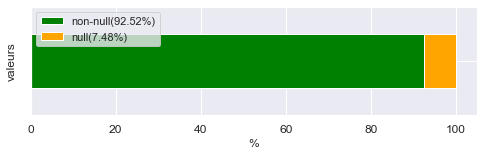

In [21]:
# Vérification de la structure du Data Set
verifier_taille(df)
afficher_echantillon(df)

In [22]:
nan_cols(df)

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,OSEBuildingID,0,0.00,6512,100.00
1,BuildingType,0,0.00,6512,100.00
2,PrimaryPropertyType,0,0.00,6512,100.00
3,PropertyName,0,0.00,6512,100.00
4,PropertyGFATotal,0,0.00,6512,100.00
5,LargestPropertyUseType,143,2.20,6369,97.80
6,LargestPropertyUseTypeGFA,143,2.20,6369,97.80
7,ENERGYSTARScore,1567,24.06,4945,75.94
8,SiteEUI(kBtu/sf),0,0.00,6512,100.00
9,TotalEmission,0,0.00,6512,100.00


In [23]:
valeurs_manquantes(df)

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,Hotel,88434.0,65.0,78.900000,249.43,7,DOWNTOWN,1927,1.0,12.0,NaN,6.977443e+06
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,Hotel,83880.0,51.0,94.400000,263.51,7,DOWNTOWN,1996,1.0,11.0,NaN,9.776630e+06
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,Hotel,757243.0,18.0,96.600000,2061.48,7,DOWNTOWN,1969,1.0,41.0,NaN,9.292823e+07
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,Hotel,123445.0,67.0,120.100000,507.70,7,DOWNTOWN,1980,1.0,18.0,NaN,1.439879e+07
5,9,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),97288,Police Station,88830.0,NaN,135.700000,304.62,7,DOWNTOWN,1999,1.0,2.0,NaN,1.320198e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,Nonresidential COS,Other,High Point Community Center,18261,Other - Recreation,18261.0,NaN,51.000000,20.33,1,DELRIDGE NEIGHBORHOODS,1982,1.0,1.0,NaN,9.313110e+05
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,16000,Other - Recreation,16000.0,NaN,59.400002,32.17,2,DOWNTOWN,2004,1.0,1.0,NaN,9.504000e+05
3373,50224,Nonresidential COS,Other,Queen Anne Pool,13157,Other - Recreation,7583.0,NaN,438.200012,223.54,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,NaN,5.765398e+06
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,14101,Other - Recreation,6601.0,NaN,51.000000,22.11,1,GREATER DUWAMISH,1989,1.0,1.0,NaN,7.191510e+05


# Analyse Explo

In [24]:
df.describe()

,OSEBuildingID,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,TotalEnergy
count,6512.000000,6.512000e+03,6.369000e+03,4945.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6.512000e+03
mean,20893.165848,9.330140e+04,7.710254e+04,67.586047,54.521698,115.884241,4.469748,1968.159859,1.070639,4.748618,5.962489e+06
std,11792.919532,1.893220e+05,1.697900e+05,27.064190,54.958068,485.142383,2.122136,33.051369,1.610970,5.534931,1.850516e+07
min,1.000000,1.128500e+04,5.656000e+03,1.000000,0.000000,-0.800000,1.000000,1900.000000,0.000000,0.000000,0.000000e+00
25%,19990.750000,2.837700e+04,2.498800e+04,52.000000,27.700001,9.467500,3.000000,1948.000000,1.000000,2.000000,9.760363e+05
50%,23071.000000,4.388400e+04,3.900000e+04,75.000000,38.300000,33.110000,4.000000,1974.000000,1.000000,4.000000,1.913294e+06
75%,25875.000000,9.000000e+04,7.412500e+04,90.000000,60.700000,91.500000,7.000000,1997.000000,1.000000,5.000000,4.699684e+06
max,50226.000000,9.320156e+06,9.320156e+06,100.000000,834.400024,16870.980000,7.000000,2015.000000,111.000000,99.000000,8.742307e+08


In [25]:
Cols = ['BuildingType', 'PropertyGFATotal',	'CouncilDistrictCode',	'YearBuilt', 'NumberofFloors' , 'PrimaryPropertyType', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',	'ENERGYSTARScore',	'TotalEnergy',	'TotalEmission']

Cols = ['PropertyGFATotal',	'CouncilDistrictCode',	'YearBuilt', 'NumberofFloors' , 'LargestPropertyUseTypeGFA',	'ENERGYSTARScore',	'TotalEnergy',	'TotalEmission']



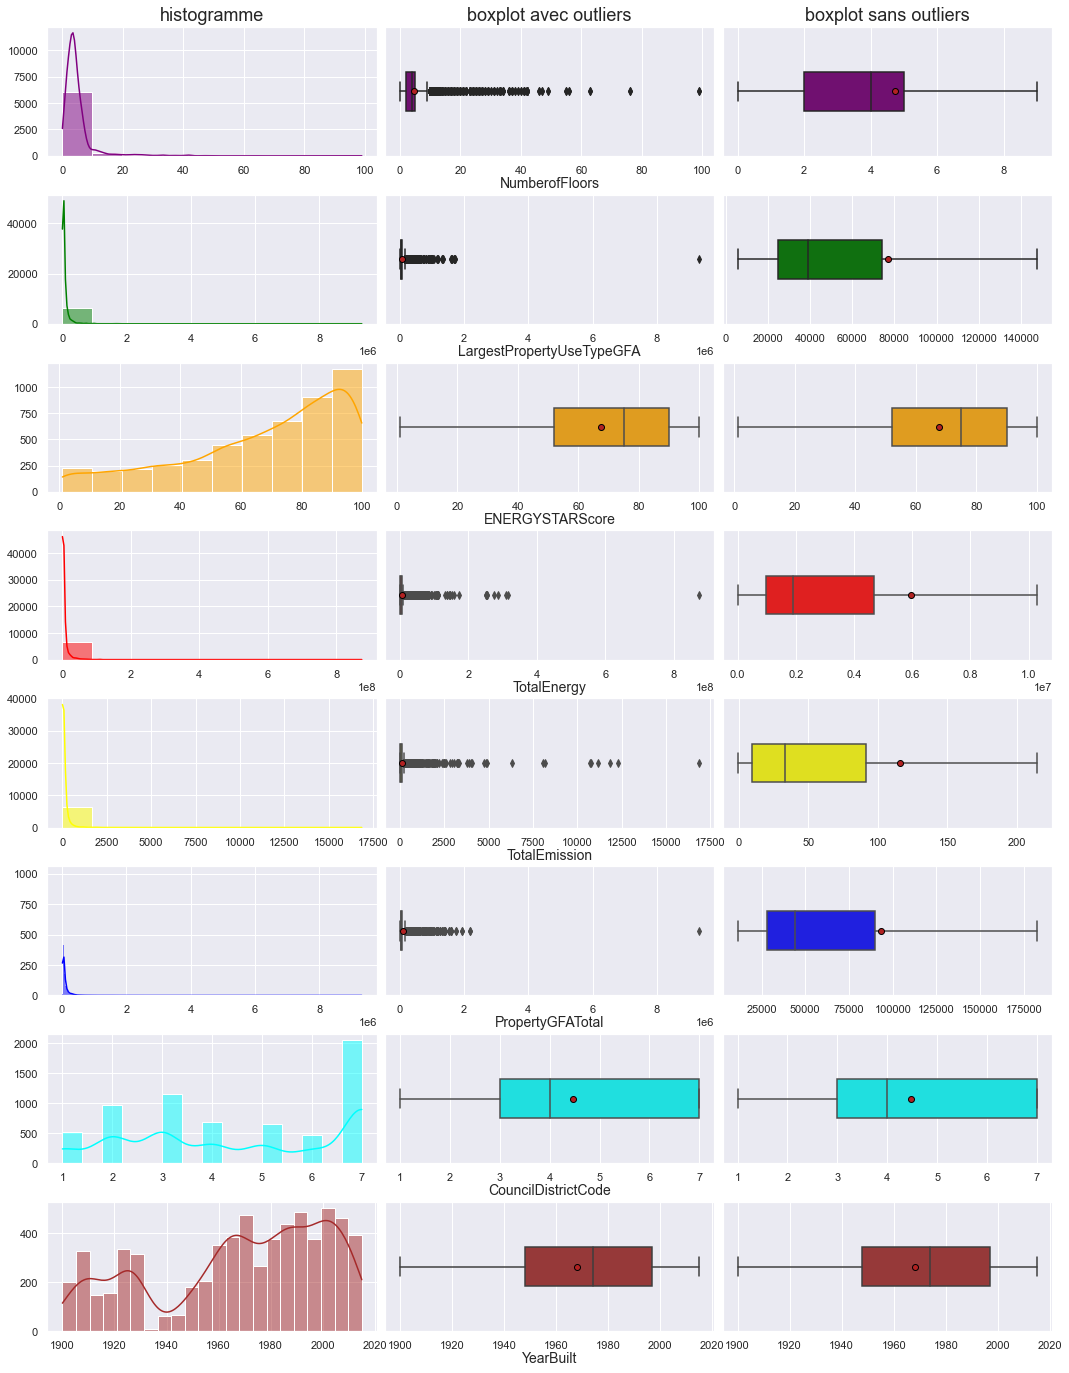

In [26]:
histo_distribution(df[Cols])

In [27]:
df[df['TotalEmission'] > 200]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,Hotel,88434.0,65.0,78.900000,249.43,7,DOWNTOWN,1927,1.0,12.0,NaN,6.977443e+06
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,Hotel,83880.0,51.0,94.400000,263.51,7,DOWNTOWN,1996,1.0,11.0,NaN,9.776630e+06
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,Hotel,757243.0,18.0,96.600000,2061.48,7,DOWNTOWN,1969,1.0,41.0,NaN,9.292823e+07
3,5,NonResidential,Hotel,HOTEL MAX,61320,Hotel,61320.0,1.0,460.400000,1936.34,7,DOWNTOWN,1926,1.0,10.0,High Outlier,2.823173e+07
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,Hotel,123445.0,67.0,120.100000,507.70,7,DOWNTOWN,1980,1.0,18.0,NaN,1.439879e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,50092,Multifamily MR (5-9),Residence Hall,Terry Hall & Maple Hall,325000,Residence Hall/Dormitory,325000.0,69.0,50.700001,467.90,4,NORTHEAST,2015,1.0,7.0,NaN,1.647750e+07
3356,50094,NonResidential,Mixed Use Property,AIBS,345290,Laboratory,151523.0,NaN,144.500000,1000.06,7,LAKE UNION,2015,1.0,6.0,NaN,4.989440e+07
3365,50208,Nonresidential COS,Other,Ballard Pool,12769,Other - Recreation,10912.0,NaN,400.799988,216.18,6,BALLARD,1972,1.0,1.0,NaN,5.117815e+06
3367,50212,Nonresidential COS,Other,Conservatory Campus,23445,Other - Recreation,23445.0,NaN,254.899994,259.22,3,EAST,1912,1.0,1.0,NaN,5.976130e+06


In [28]:
# afficher_correlations(df[df['PrimaryPropertyType']=='Hospital'], variables=Cols)

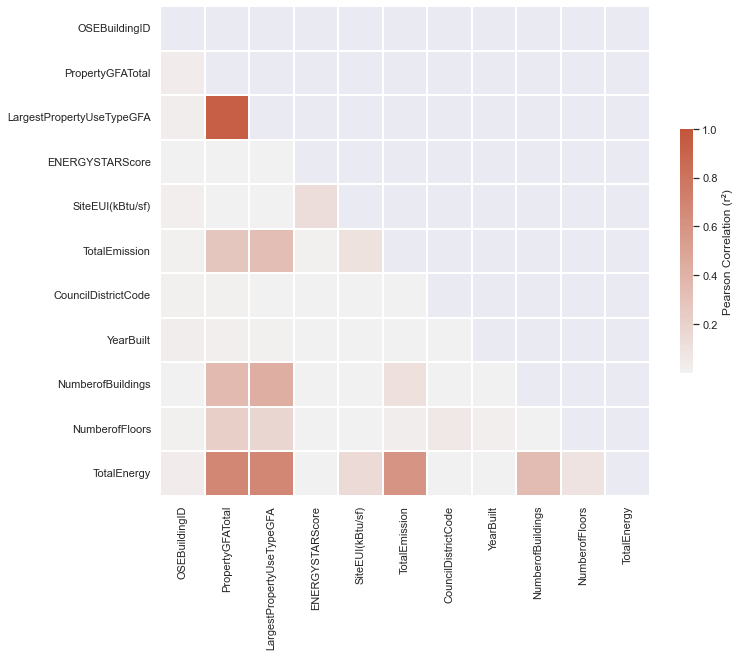

In [29]:
correlation_matrix(df)

# Learning

In [30]:
df.shape

(6512, 17)

In [31]:
df2 = df[df['TotalEnergy']<=df['TotalEnergy'].median()]

In [32]:
XCols = ['PropertyGFATotal', 'CouncilDistrictCode',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'TotalEnergy']
y = 'TotalEnergy'
# X = MinMax_Scaled(df[XCols], frame=True)
X = df[XCols].sort_values(by=[y])

random_state = 0 #None

X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state, scale='min-max', scale_y=True)
X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state, scale='min-max')
# X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state, scale='std')
# X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state)

In [33]:
valeurs_manquantes(X)

,PropertyGFATotal,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,TotalEnergy


In [34]:
print(len(X_train),len(X_test))

5209 1303


In [35]:
X_train

array([[3.41613569e-03, 1.00000000e+00, 5.21739130e-02, 9.00900901e-03,
        4.04040404e-02],
       [9.83190472e-04, 0.00000000e+00, 7.30434783e-01, 9.00900901e-03,
        4.04040404e-02],
       [3.22061486e-03, 6.66666667e-01, 7.13043478e-01, 9.00900901e-03,
        4.04040404e-02],
       ...,
       [2.55283601e-03, 0.00000000e+00, 5.91304348e-01, 9.00900901e-03,
        3.03030303e-02],
       [3.23887779e-03, 1.00000000e+00, 7.91304348e-01, 9.00900901e-03,
        6.06060606e-02],
       [1.06515882e-03, 1.66666667e-01, 8.08695652e-01, 0.00000000e+00,
        3.03030303e-02]])

In [36]:
y_train

array([1565424.        ,  404237.8       ,  954105.58416768, ...,
        985454.4       , 1451639.8       , 1540080.06588   ])

In [37]:
y_train.std()

18846651.45386322

## Baselines

RMSE : 17064262.72 RMSE(%) : 5.43
RMSLE : 1.58
R² : -0.00 RSE : 1.00


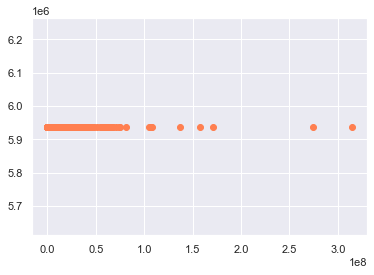

In [38]:
from sklearn import dummy, metrics
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train, y_train)
# Prédiction sur le jeu de test
y_pred = dum.predict(X_test)

# Evaluatation
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')


## Naive KNN Regressor

RMSE : 18782043.96 RMSE(%) : 5.98
RMSLE : 1.37
R² : -0.21 RSE : 0.79


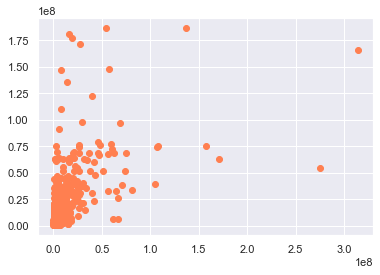

In [39]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

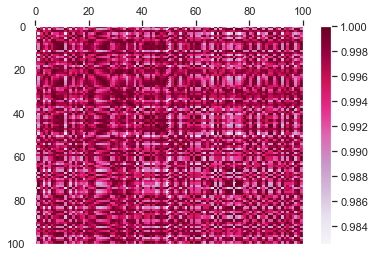

In [40]:
# Gram/K Matrix
from matplotlib import cm
kmatrix = metrics.pairwise.rbf_kernel(X_train, gamma=0.01)

kmatrix = kmatrix[:100, :100]

# dessiner la matrice
plt.pcolor(kmatrix, cmap=cm.PuRd) 

# rajouter la légende
plt.colorbar()

# retourner l'axe des ordonnées
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

# afficher l'image
plt.show()

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 3}
RMSE : 23365834.51 RMSE(%) : 7.44
RMSLE : 1.42
R² : -0.88 RSE : 0.12


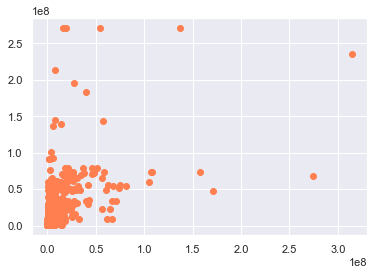

In [41]:
#-------------------------- GridSearchCV --------------------------
from sklearn import neighbors, model_selection

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':list(range(3,21))}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_mean_squared_log_error'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
regr = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score,   # score à optimiser
    n_jobs=-1
)

# Optimiser ce classifieur sur le jeu d'entraînement
regr.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(regr.best_params_)

y_pred = regr.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

## Kernal Ridge Regressor

RMSE : 23365834.51 RMSE(%) : 7.44
RMSLE : 1.42
R² : -0.88 RSE : 0.12


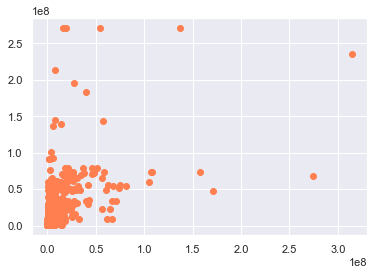

In [42]:
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

## Gram Matrix

## Neural Net Regressor

In [43]:
from sklearn.neural_network import MLPRegressor

nnr = MLPRegressor(random_state=1, hidden_layer_sizes=(15, 10, 5,), max_iter=5000)

nnr.fit(X_train, y_train)
y_pred = nnr.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [  -1.38465371 -136.55672981   -1.34624474   -1.50257362   -0.73572892
 -121.11379364           nan   -0.9327151  -135.27659895   -2.2803292
   -2.27877781   -2.27305966 -120.49882897   -2.16209157   -2.08390452
           nan   -1.38825772 -136.55672981   -1.34902334   -1.50747759
   -0.73711637 -121.11379364           nan   -0.93950671 -135.27660612
   -2.28032921   -2.27877778   -2.27306553 -120.49882897   -2.15599574
   -2.08737739           nan   -1.38208283 -136.55672981   -1.34775447
   -1.50383741   -0.73471605 -121.11379364   -0.73566594   -0.93526821
 -135.2765991    -2.28032903   -2.2787769    -2.27343309 -120.49882897
   -2.16204217   -2.08993219           nan   -1.36058649 -136.55672981
   -1.39493639   -1.53087351   -0.71382805 -121.11379364   -0.73441992
   -0.96937749 -135.2766137    -2.28032907   -2.27877628   -2.26986604
 -120.49883499   -2

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 0.0001, 'hidden_layer_sizes': (20, 15, 10, 5), 'max_iter': 2000, 'random_state': 0}
RMSE : 49569514.67 RMSE(%) : 15.78
RMSLE : 2.82
R² : -7.44 RSE : -6.44


C:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


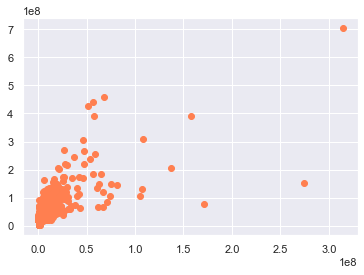

In [ ]:
# # Fixer les valeurs des hyperparamètres à tester
# param_grid = {'max_iter': np.arange(1000, 3000, 1000), 'alpha': 10.0 ** -np.arange(1, 7), 'random_state':np.arange(4), 'hidden_layer_sizes':[(20, 15, 10, 5,),(15, 10, 5,)]}

# # Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
# score = 'neg_mean_squared_log_error'

# # Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
# regr = model_selection.GridSearchCV(
#     MLPRegressor(), # un classifieur kNN
#     param_grid,     # hyperparamètres à tester
#     cv=5,           # nombre de folds de validation croisée
#     scoring=score,   # score à optimiser
#     n_jobs=-1
# )

# # Optimiser ce classifieur sur le jeu d'entraînement
# regr.fit(X_train, y_train)

# # Afficher le(s) hyperparamètre(s) optimaux
# print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
# print(regr.best_params_)

# y_pred = regr.predict(X_test)

# print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
# print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
# print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-np.abs(metrics.r2_score(y_test, y_pred))))
# plt.scatter(y_test, y_pred, color='coral')